In [210]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# Missing Values

In [211]:
df_data_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

There are 194,673 accidents reported and all of them have a Severity code which means there is no missing data.  However, some of the attributes which may be considered for projecting accidents, have some missing data, including ROADCOND and LIGHTCOND, which both are missing approximately 2.5%.  The missing values for Road Condition and Light Condition will be removed later before analysis.

The date and time parameters INCDATE and INCDTTM do not have any missing data.

In [212]:
print('Missing values in ROADCOND:', df_data_8["ROADCOND"].isna().sum(),'\n'
    'Missing values in LIGHTCOND:', df_data_8["LIGHTCOND"].isna().sum(), '\n'
    'Missing values in INCDATE:', df_data_8["INCDATE"].isna().sum(),'\n'
    'Missing values in SEVERITYCODE:', df_data_8["SEVERITYCODE"].isna().sum())

Missing values in ROADCOND: 5012 
Missing values in LIGHTCOND: 5170 
Missing values in INCDATE: 0 
Missing values in SEVERITYCODE: 0


# Target Value is SEVERITYCODE

The Target Value of SEVERITYCODE indicates the value 1 if there is an accident with property damage and 2 if there is injury. Approximately 30% of the accidents on file are injury related.

In [214]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
df_data_8['SEVERITYCODE'].value_counts()
df_data_8.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

Accidents classified in each level of severity:
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64


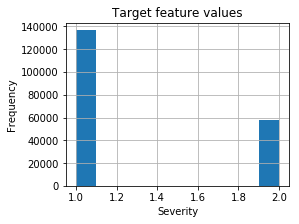

In [219]:
df_data_8['SEVERITYCODE'].hist(figsize=(4,3))
plt.title('Target feature values')
plt.xlabel('Severity')
plt.ylabel('Frequency')
print('Accidents classified in each level of severity:')
print(df_data_8.SEVERITYCODE.value_counts())

In [220]:
df_data_8['INCDATE'].describe()

count                     194673
unique                      5985
top       2006/11/02 00:00:00+00
freq                          96
Name: INCDATE, dtype: object

In [221]:
df_data_8['OBJECTID'].describe()

count    194673.000000
mean     108479.364930
std       62649.722558
min           1.000000
25%       54267.000000
50%      106912.000000
75%      162272.000000
max      219547.000000
Name: OBJECTID, dtype: float64

In [222]:
df_an=df_data_8[['SEVERITYCODE', 'OBJECTID', 'INCDATE','ROADCOND','LIGHTCOND','INCDTTM']]
df_an['dummy']=1
df_an['RD_CAT']=1
df_an['LC_CAT']=1
df_an.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,SEVERITYCODE,OBJECTID,INCDATE,ROADCOND,LIGHTCOND,INCDTTM,dummy,RD_CAT,LC_CAT
0,2,1,2013/03/27 00:00:00+00,Wet,Daylight,3/27/2013 2:54:00 PM,1,1,1
1,1,2,2006/12/20 00:00:00+00,Wet,Dark - Street Lights On,12/20/2006 6:55:00 PM,1,1,1
2,1,3,2004/11/18 00:00:00+00,Dry,Daylight,11/18/2004 10:20:00 AM,1,1,1
3,1,4,2013/03/29 00:00:00+00,Dry,Daylight,3/29/2013 9:26:00 AM,1,1,1
4,2,5,2004/01/28 00:00:00+00,Wet,Daylight,1/28/2004 8:04:00 AM,1,1,1


Transform Road Conditions and Light Conditions from Categorical Data to Numerical Data for Analysis

In [43]:
df_an['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [223]:
def RC_to_numeric(x):
    if x=='Dry':
        return 1
    if x=='Sand/Mud/Dirt':
        return 2
    if x=='Standing Water':
        return 3
    if x=='Unknown':
        return 3
    if x=='Other':
        return 3
    if x=='Wet':
        return 4
    if x=='Snow/Slush':
        return 5
    if x=='Ice':
        return 6
    if x=='Oil':
        return 6
df_an['RD_CAT'] = df_an['ROADCOND'].apply(RC_to_numeric)
df_an.head()
    

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,SEVERITYCODE,OBJECTID,INCDATE,ROADCOND,LIGHTCOND,INCDTTM,dummy,RD_CAT,LC_CAT
0,2,1,2013/03/27 00:00:00+00,Wet,Daylight,3/27/2013 2:54:00 PM,1,4.0,1
1,1,2,2006/12/20 00:00:00+00,Wet,Dark - Street Lights On,12/20/2006 6:55:00 PM,1,4.0,1
2,1,3,2004/11/18 00:00:00+00,Dry,Daylight,11/18/2004 10:20:00 AM,1,1.0,1
3,1,4,2013/03/29 00:00:00+00,Dry,Daylight,3/29/2013 9:26:00 AM,1,1.0,1
4,2,5,2004/01/28 00:00:00+00,Wet,Daylight,1/28/2004 8:04:00 AM,1,4.0,1


In [224]:
df_an['RD_CAT'].value_counts()

1.0    124510
4.0     47474
3.0     15325
6.0      1273
5.0      1004
2.0        75
Name: RD_CAT, dtype: int64

In [225]:
df_an['LIGHTCOND'].value_counts()


Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [226]:
def LC_to_numeric(x):
    if x=='Daylight':
        return 1
    if x=='Dusk':
        return 2
    if x=='Dawn':
        return 2
    if x=='Dark - Street Lights On':
        return 3
    if x=='Dark - No Street Lights':
        return 3
    if x=='Dark - Street Lights Off':
        return 3
    if x=='Dark - Unknown Lighting':
        return 3
    if x=='Other':
        return 4
    if x=='Unknown':
        return 4
df_an['LC_CAT'] = df_an['LIGHTCOND'].apply(LC_to_numeric)
df_an.head()
    

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,SEVERITYCODE,OBJECTID,INCDATE,ROADCOND,LIGHTCOND,INCDTTM,dummy,RD_CAT,LC_CAT
0,2,1,2013/03/27 00:00:00+00,Wet,Daylight,3/27/2013 2:54:00 PM,1,4.0,1.0
1,1,2,2006/12/20 00:00:00+00,Wet,Dark - Street Lights On,12/20/2006 6:55:00 PM,1,4.0,3.0
2,1,3,2004/11/18 00:00:00+00,Dry,Daylight,11/18/2004 10:20:00 AM,1,1.0,1.0
3,1,4,2013/03/29 00:00:00+00,Dry,Daylight,3/29/2013 9:26:00 AM,1,1.0,1.0
4,2,5,2004/01/28 00:00:00+00,Wet,Daylight,1/28/2004 8:04:00 AM,1,4.0,1.0


### Remove the rows with missing data in Road Conditions and/or Light Conditions

In [227]:
import pandas as pd
import numpy as np
df_an.dropna(subset=["RD_CAT","LC_CAT"],inplace=True)
df_an.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189443 entries, 0 to 194672
Data columns (total 9 columns):
SEVERITYCODE    189443 non-null int64
OBJECTID        189443 non-null int64
INCDATE         189443 non-null object
ROADCOND        189443 non-null object
LIGHTCOND       189443 non-null object
INCDTTM         189443 non-null object
dummy           189443 non-null int64
RD_CAT          189443 non-null float64
LC_CAT          189443 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 14.5+ MB


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [115]:

df_an['RD_CAT'] = pd.to_numeric(df_an['RD_CAT'], errors='coerce')
df_an['LC_CAT'] = pd.to_numeric(df_an['LC_CAT'], errors='coerce')
#df_an[["RD_CAT", "LC_CAT"]] = df_an[["RD_CAT", "LC_CAT"]].apply(pd.to_numeric, errors=coerce)
#df_an=df_an.astype({"RD_CAT":'int', "LC_CAT":'int'})
#df_an['RD_CAT'] = df_an['RD_CAT'].apply(np.int64) 
#pd.to_numeric(y, downcast='signed')
df_an = df_an.dropna(subset=['RD_CAT'])
df_an = df_an.dropna(subset=['LC_CAT'])

df_an['RD_CAT'] = df_an['RD_CAT'].astype(int)
df_an['LC_CAT'] = df_an['LC_CAT'].astype(int)

df_an.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189443 entries, 0 to 194672
Data columns (total 9 columns):
SEVERITYCODE    189443 non-null int64
OBJECTID        189443 non-null int64
INCDATE         189443 non-null object
ROADCOND        189443 non-null object
LIGHTCOND       189443 non-null object
INCDTTM         189443 non-null object
dummy           189443 non-null int64
RD_CAT          189443 non-null int64
LC_CAT          189443 non-null int64
dtypes: int64(5), object(4)
memory usage: 14.5+ MB


### Reviewing the Year and Month data

In [228]:
import datetime as dt

date=df_an

df_an['INCDATE'] = df_an['INCDATE'].apply(lambda x: pd.Timestamp(x))
df_an['year'] = df_an.INCDATE.dt.year
df_an['month'] = df_an.INCDATE.dt.month
df_an['dummy']=1
df_month=date.copy()

import pandas as pd
df_an.sort_values(by ='year', inplace=True)
df_an.set_index(["year","SEVERITYCODE"]).count(level="year")


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

,OBJECTID,INCDATE,ROADCOND,LIGHTCOND,INCDTTM,dummy,RD_CAT,LC_CAT,month
year,,,,,,,,,
2004,11865,11865,11865,11865,11865,11865,11865,11865,11865
2005,15115,15115,15115,15115,15115,15115,15115,15115,15115
2006,15181,15181,15181,15181,15181,15181,15181,15181,15181
2007,14450,14450,14450,14450,14450,14450,14450,14450,14450
2008,13654,13654,13654,13654,13654,13654,13654,13654,13654
2009,11734,11734,11734,11734,11734,11734,11734,11734,11734
2010,10804,10804,10804,10804,10804,10804,10804,10804,10804
2011,10919,10919,10919,10919,10919,10919,10919,10919,10919
2012,10244,10244,10244,10244,10244,10244,10244,10244,10244


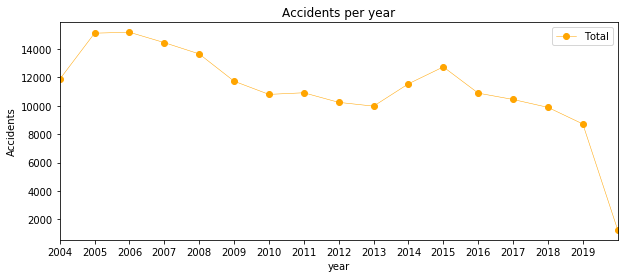

In [229]:
yearly = df_an[['year', 'dummy']].groupby('year').count()
yearly['dummy'].plot.line(figsize=(10,4), marker='o', linewidth=0.5, color='orange', label='Total')
plt.title('Accidents per year')
plt.xticks(range(2004,2020))
plt.xlim(2004,2020)
plt.ylabel('Accidents')
plt.legend()

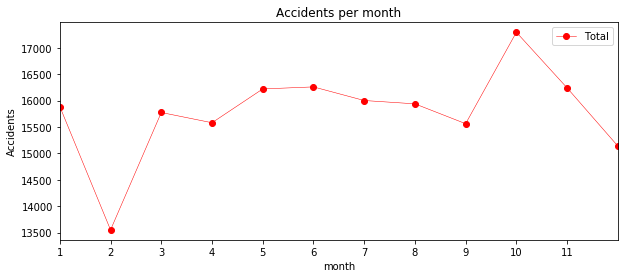

In [136]:
df_month.head()
df_month.sort_values(by ='month', inplace=True)
df_month.set_index(["month","dummy"]).count(level="month")

monthly = df_month[['month', 'dummy']].groupby('month').count()
monthly['dummy'].plot.line(figsize=(10,4), marker='o', linewidth=0.5, color='red', label='Total')
plt.title('Accidents per month')
plt.xticks(range(1,12))
plt.xlim(1,12)
plt.ylabel('Accidents')
plt.legend()


In [230]:
df_an.corr(method='kendall')

,SEVERITYCODE,OBJECTID,dummy,RD_CAT,LC_CAT,year,month
SEVERITYCODE,1.000000,0.021653,NaN,-0.035332,-0.103992,0.022860,0.003718
OBJECTID,0.021653,1.000000,NaN,-0.002544,-0.009626,0.927121,0.020931
dummy,NaN,NaN,1.0,NaN,NaN,NaN,NaN
RD_CAT,-0.035332,-0.002544,NaN,1.000000,0.214388,-0.002866,0.014890
LC_CAT,-0.103992,-0.009626,NaN,0.214388,1.000000,-0.012860,0.038011
year,0.022860,0.927121,NaN,-0.002866,-0.012860,1.000000,-0.003237
month,0.003718,0.020931,NaN,0.014890,0.038011,-0.003237,1.000000


# DATA ANALYSIS AND METHODOLOGY

In [231]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline


In [232]:
df_an.info()
df_an.corr(method='kendall')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189443 entries, 10499 to 186698
Data columns (total 11 columns):
SEVERITYCODE    189443 non-null int64
OBJECTID        189443 non-null int64
INCDATE         189443 non-null datetime64[ns, UTC]
ROADCOND        189443 non-null object
LIGHTCOND       189443 non-null object
INCDTTM         189443 non-null object
dummy           189443 non-null int64
RD_CAT          189443 non-null float64
LC_CAT          189443 non-null float64
year            189443 non-null int64
month           189443 non-null int64
dtypes: datetime64[ns, UTC](1), float64(2), int64(5), object(3)
memory usage: 17.3+ MB


,SEVERITYCODE,OBJECTID,dummy,RD_CAT,LC_CAT,year,month
SEVERITYCODE,1.000000,0.021653,NaN,-0.035332,-0.103992,0.022860,0.003718
OBJECTID,0.021653,1.000000,NaN,-0.002544,-0.009626,0.927121,0.020931
dummy,NaN,NaN,1.0,NaN,NaN,NaN,NaN
RD_CAT,-0.035332,-0.002544,NaN,1.000000,0.214388,-0.002866,0.014890
LC_CAT,-0.103992,-0.009626,NaN,0.214388,1.000000,-0.012860,0.038011
year,0.022860,0.927121,NaN,-0.002866,-0.012860,1.000000,-0.003237
month,0.003718,0.020931,NaN,0.014890,0.038011,-0.003237,1.000000


The data is now ready to be analyzed by the machine learning models.

We will use the following models:

K-Nearest Neighbor (KNN)
KNN will help us predict the target vale "severity code" of each outcome by finding the most similar data point within k distance.

Decision Tree
A decision tree model provides a layout of all possible outcomes to fully analyze the concequences of a decision. The decision tree observes all possible outcomes of different driving conditions.

Logistic Regression
The dataset only provides two severity code outcomes (1 or 2), the model will only predict one of those two classes. Therefore logistic regression will be used.





In [233]:
df_an.head()

,SEVERITYCODE,OBJECTID,INCDATE,ROADCOND,LIGHTCOND,INCDTTM,dummy,RD_CAT,LC_CAT,year,month
10499,1,13214,2004-05-12 00:00:00+00:00,Unknown,Unknown,5/12/2004 9:08:00 AM,1,3.0,4.0,2004,5
9865,2,12400,2004-10-05 00:00:00+00:00,Dry,Daylight,10/5/2004,1,1.0,1.0,2004,10
9866,1,12402,2004-09-03 00:00:00+00:00,Dry,Dusk,9/3/2004,1,1.0,2.0,2004,9
9867,1,12403,2004-03-10 00:00:00+00:00,Dry,Daylight,3/10/2004 6:51:00 AM,1,1.0,1.0,2004,3
9868,1,12405,2004-04-13 00:00:00+00:00,Dry,Daylight,4/13/2004 4:26:00 PM,1,1.0,1.0,2004,4


## Defining X and Y and Normalize the Dataset

In [234]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline

X=np.asarray(df_an[['RD_CAT', 'LC_CAT', 'year', 'month']])
X[0:5]
y=np.asarray(df_an['SEVERITYCODE'])
y[0:5]

np.array(np.unique(y, return_counts=True)).T
y.shape


X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
#X[0:5]

#from sklearn import svm

#clf=svm.SVC(kernel='rbf')
#clf.fit(X_train,y_train)
#yhat=clf.predict(X_test)
#yhat[0:5]


### Train/Test Split

The analysis will use 30% of the data for testing and 70% for training.

In [235]:

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=4)
#xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2) 

print('Train set:', X_train.shape,y_train.shape)
print('Test set:',X_test.shape, y_test.shape)
np.array(np.unique(y_test, return_counts=True)).T


Train set: (132610, 4) (132610,)
Test set: (56833, 4) (56833,)


array([[    1, 39799],
       [    2, 17034]])

### K-Nearest Neighbors (KNN)

In [236]:
from sklearn.metrics import jaccard_similarity_score, classification_report, precision_score, recall_score, accuracy_score
#Search for the best K
tt = X_train.shape[0]
tv = X_test.shape[0]
X_train[int(tt*0.5):].shape[0], X_test[int(tv*0.5):].shape[0]





(66305, 28417)

In [238]:
ks = 17
mean_acc = np.zeros(ks-1)
std_acc = np.zeros(ks-1)

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train[int(tt*0.5):],y_train[int(tt*0.5):])
    KyHat = neigh.predict(X_test[int(tv*0.5):])
    mean_acc[n-1] = accuracy_score(y_test[int(tv*0.5):],KyHat)
    std_acc[n-1] = np.std(KyHat==y_test[int(tv*0.5):])/np.sqrt(KyHat.shape[0])
print('Best performing K is '+ str(mean_acc.argmax()+1) + ' with an accuracy of ' +str(mean_acc.max()))


Best performing K is 14 with an accuracy of 0.6813175212020973


In [255]:


from sklearn.neighbors import KNeighborsClassifier
k=14



In [240]:
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)

np.array(np.unique(y_train, return_counts=True)).T

#neigh

array([[    1, 92560],
       [    2, 40050]])

In [241]:
KyHat = neigh.predict(X_test)
np.array(np.unique(KyHat, return_counts=True)).T

array([[    1, 54184],
       [    2,  2649]])

### Decision Tree Analysis

In [242]:
from sklearn.tree import DecisionTreeClassifier
AccTree = DecisionTreeClassifier(criterion="entropy",max_depth=5)
AccTree
AccTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [243]:
DTyHat=AccTree.predict(X_test)
#np.array(np.unique(DTyHat, return_counts=True)).T
#np.array(np.unique(y_test, return_counts=True)).T

### Logistic Regression


In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score


LR=LogisticRegression(C=10,solver='liblinear').fit(X_train,y_train)
LR
print('Coefficients', LR.coef_)
print('Intercept', LR.intercept_)

Coefficients [[-0.0177224  -0.2689197   0.05618802  0.01975951]]
Intercept [-0.85423642]


In [245]:
LRyHat=LR.predict(X_test)
np.array(np.unique(LRyHat, return_counts=True)).T

array([[    1, 56833]])

In [246]:
LRyHat_prob=LR.predict_proba(X_test)
LRyHat_prob

array([[0.65438991, 0.34561009],
       [0.65701008, 0.34298992],
       [0.66090073, 0.33909927],
       ...,
       [0.65281911, 0.34718089],
       [0.80718087, 0.19281913],
       [0.78173259, 0.21826741]])

# Results and Evaluation

Accuracy Check of the models


### KNN

In [247]:
#Jaccard Simiality Score

from sklearn.metrics import jaccard_similarity_score, classification_report, precision_score, recall_score
jaccard_similarity_score(y_test,KyHat)

0.6858691253321134

In [248]:

jaccard_knn = jaccard_similarity_score(y_test,KyHat)
c_knn = classification_report(y_test,KyHat)
prec_knn = precision_score(y_test, KyHat)
rec_knn = recall_score(y_test, KyHat)
print('Jaccard :',jaccard_knn,'\n',
     c_knn)

Jaccard : 0.6858691253321134 
               precision    recall  f1-score   support

           1       0.70      0.96      0.81     39799
           2       0.35      0.05      0.09     17034

   micro avg       0.69      0.69      0.69     56833
   macro avg       0.52      0.51      0.45     56833
weighted avg       0.60      0.69      0.60     56833



### Decision Tree

In [249]:
#Jaccard Simiality Score



In [250]:
jaccard_rf = jaccard_similarity_score(y_test,DTyHat)
c_rf = classification_report(y_test,DTyHat)
prec_rf = precision_score(y_test, DTyHat)
rec_rf = recall_score(y_test, DTyHat)
print('Jaccard :',jaccard_rf,'\n',
     c_rf)

Jaccard : 0.7002797670367568 
               precision    recall  f1-score   support

           1       0.70      1.00      0.82     39799
           2       0.00      0.00      0.00     17034

   micro avg       0.70      0.70      0.70     56833
   macro avg       0.35      0.50      0.41     56833
weighted avg       0.49      0.70      0.58     56833



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Logistic Regression

In [251]:
r2_score(LRyHat, y_test)

0.0

In [252]:
print("R2 score:"% r2_score(LRyHat, y_test))

R2 score:


In [253]:
from sklearn.metrics import log_loss
log_loss(y_test,LRyHat_prob)

0.6036866294979948

In [254]:
jaccard_lr = jaccard_similarity_score(y_test,LRyHat)
c_lr = classification_report(y_test,LRyHat)
prec_lr = precision_score(y_test, LRyHat)
rec_lr = recall_score(y_test, LRyHat)
print('Jaccard :',jaccard_lr,'\n',
     c_lr)

Jaccard : 0.7002797670367568 
               precision    recall  f1-score   support

           1       0.70      1.00      0.82     39799
           2       0.00      0.00      0.00     17034

   micro avg       0.70      0.70      0.70     56833
   macro avg       0.35      0.50      0.41     56833
weighted avg       0.49      0.70      0.58     56833



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
